# Kuis 1

NIM     : 2041720140 <br>
Nama    : Ananda Ayu Sekar Wiranti <br>
Kelas   : TI-3A / 02 <br>

## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [150]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

# Jawaban kuis

In [151]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [152]:
print(df.info())
print('\n')

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
m

#### _Soal_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)

In [153]:
# Replacing string values to numbers
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

# Cek data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


#### _Soal_

2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[['age', 'bmi', 'region','sex', 'smoker', 'children']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age   7.966654
1       bmi  10.062762
2    region   4.866264
3       sex   1.926450
4    smoker   1.254323
5  children   1.801892


In [155]:
#Untuk data frame di copy sebelum dilakukan penghapusan pada kolom 'age' dan 'bmi'
data_df = df.copy()
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [156]:
#Melakukan penghapusan kolom "age" dan "bmi"
data_df = data_df.drop(columns=['age', 'bmi'])
data_df.head()

,sex,children,smoker,region,charges
0,1,0,1,1,16884.92400
1,0,1,0,2,1725.55230
2,0,3,0,2,4449.46200
3,0,0,0,3,21984.47061
4,0,0,0,3,3866.85520


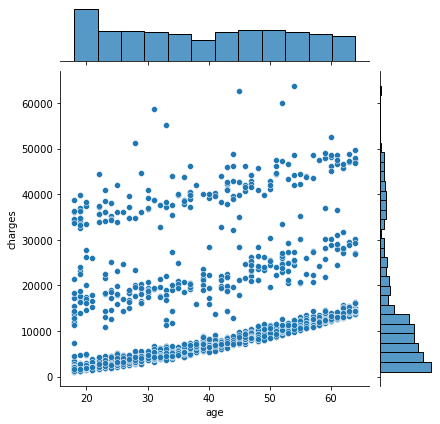

In [157]:
import seaborn as sns

# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=df['age'],y=df['charges'])

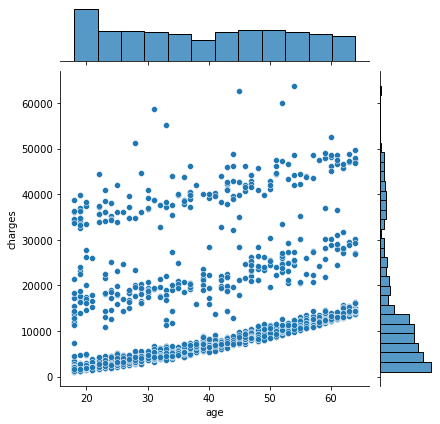

In [158]:
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=df['age'],y=df['charges'])

In [159]:
# features
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]

# predicted variable
y = df['charges']

In [160]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [161]:
# importing train_test_split model
from sklearn.model_selection import train_test_split

# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [162]:
len(X_test) # 402
len(X_train) # 936
len(df) # 1338

1338

In [163]:
data = LinearRegression()
# Fit linear model by passing training dataset
data.fit(X_train,y_train)

LinearRegression()

In [164]:
# Predicting the target variable for test datset
prediction = data.predict(X_test)

prediction[0:5]

array([ 3317.3609977 , 12860.19713651, 30611.1936918 ,  6651.92686074,
       13137.92985243])

Text(0, 0.5, 'Predicted Y')

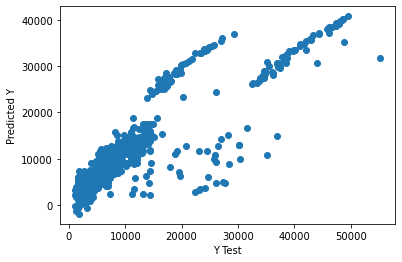

In [165]:
import matplotlib.pyplot as plt

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [166]:
# Predict charges for new customer : Name- Frank
data2 = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
index = [1]
frank = pd.DataFrame(data2,index)
frank

,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [167]:
prediction_frank = data.predict(frank)
print("Medical Insurance cost for Frank is : ",prediction_frank)

Medical Insurance cost for Frank is :  [38434.41054301]


#### _Soal_

5. Evaluasi model yang Anda buat dengan nilai $R^2$

In [169]:
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

In [170]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [171]:
y = y.reshape(len(y), 1)
y.shape

(1338, 1)

In [172]:
mlr = LinearRegression()
mlr.fit(Xm_train, ym_train)

ym_pred = mlr.predict(Xm_test)

In [174]:
gabung = np.concatenate((ym_test, ym_pred))
gabung

array([ 5976.8311    ,  5846.9176    , 13831.1152    ,  9625.92      ,
        2680.9493    , 47896.79135   , 18223.4512    ,  7419.4779    ,
        3732.6251    , 12222.8983    ,  7050.0213    , 21978.6769    ,
        6282.235     , 37701.8768    ,  7046.7222    , 12032.326     ,
       13112.6048    ,  4239.89265   , 12333.828     ,  3410.324     ,
        1727.785     , 44641.1974    , 17128.42608   ,  6112.35295   ,
        4529.477     , 10594.50155   ,  6402.29135   , 46151.1245    ,
        1711.0268    ,  1704.70015   , 45863.205     ,  4687.797     ,
       15019.76005   ,  3180.5101    ,  3861.20965   ,  3443.064     ,
       27117.99378   ,  2709.24395   , 13451.122     , 47928.03      ,
       23563.01618   ,  6710.1919    , 14235.072     , 14001.1338    ,
       27218.43725   , 13390.559     , 41034.2214    ,  2020.177     ,
       14256.1928    , 21232.18226   , 48675.5177    ,  6986.697     ,
        4149.736     , 30942.1918    ,  8023.13545   , 42124.5153    ,
      

In [175]:
r2_mlr = r2_score(ym_test, ym_pred)
print(r2_mlr)

0.6555329270408834


#### _Soal_

6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

## Kesimpulan

Dapat disimpulkan bahwa hasil dari keduannya sama-sama akurat tetapi dengan menggunakan r2 hasil lebih baik karena hasil yang didapat lebih efektif.